**Import des librairies**

In [223]:
# import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import mysql.connector
import seaborn as sns
from sklearn import linear_model

**Q1:** Récupération des données  

In [224]:
# récupération cardata.csv
car_data = pd.read_csv("C:/Users/Lenovo/Documents/DigitalLab/DataVisualization/Mini_projet/carData.csv")

**Q2:** Parcourir les données <br/>
● Car_Name: Cette colonne doit être remplie avec le nom de la voiture.<br/>
● Year: Cette colonne doit être remplie avec l'année de fabrication de la voiture.<br/>
● Selling_Price: cette colonne doit être remplie avec le prix auquel le propriétaire
souhaite vendre la voiture.<br/>
● Kms_Driven: Il s'agit de la distance parcourue par la voiture en km.<br/>
● Fuel_Type: Type de carburant de la voiture.<br/>
● Seller_Type: définit si le vendeur est un revendeur ou un particulier.<br/>
● Transmission: définit si la boite de vitesse de la voiture est manuelle ou
automatique.<br/>

In [225]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [226]:
# parcourir les colonnes 
print(car_data.head())

# taille du jeu de données
car_data.shape

# données quantitatives
df = car_data

# calcul des statistiques de base sur les données 
# describe() le fait automatiquement sur les données numériques
# drop(['label'],axe) permet d'exclure une colonne pour laquelle le calcul 
# des statistiques ne serait pas pertinent
print('\n'+'Statistiques de base:')
print(df.describe().drop(['Year'],1))

# vérifier s'il y a des valeurs nulles dans le jeu de données
print('\n'+'Valeurs nulles dans le jeu de données:')
df.isnull().sum()

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Statistiques de base:
       Selling_Price  Present_Price     Kms_Driven       Owner
count     301.000000     301.000000     301.000000  301.000000
mean        4.661296       7.628472   36947.205980    0.043189
std         5.082812       8.644115   38886.883882    0.247915
min         0.100000       0.320000     500.000000    0.000000
25%         0

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Q4:** Visualisation des données avec Matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

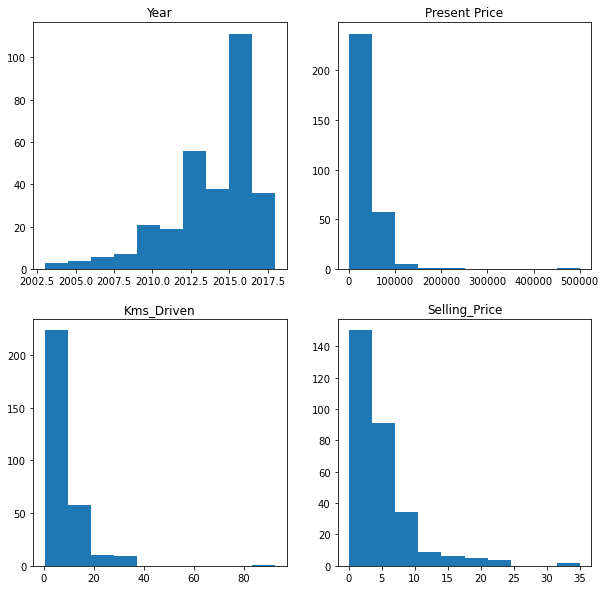

In [227]:
# trame de données = données numériques sans year
dfnum = df.select_dtypes(include=['number'])


# plot de la distribution (histogramme) avec MatplotLib
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(dfnum.Year)
axs[1, 0].hist(dfnum.Present_Price)
axs[0, 1].hist(dfnum.Kms_Driven)
axs[1, 1].hist(dfnum.Selling_Price)

axs[0, 0].title.set_text("Year")
axs[0, 1].title.set_text("Present Price")
axs[1, 0].title.set_text("Kms_Driven")
axs[1, 1].title.set_text("Selling_Price")
plt.show

**Q4:**Visualisez les données grâce à la librairie Seaborn (tracé catplot).

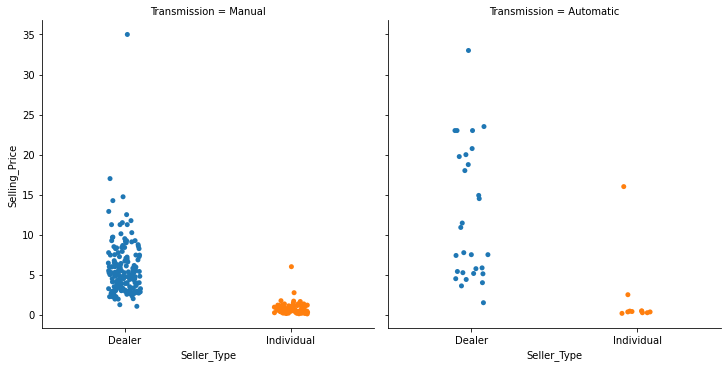

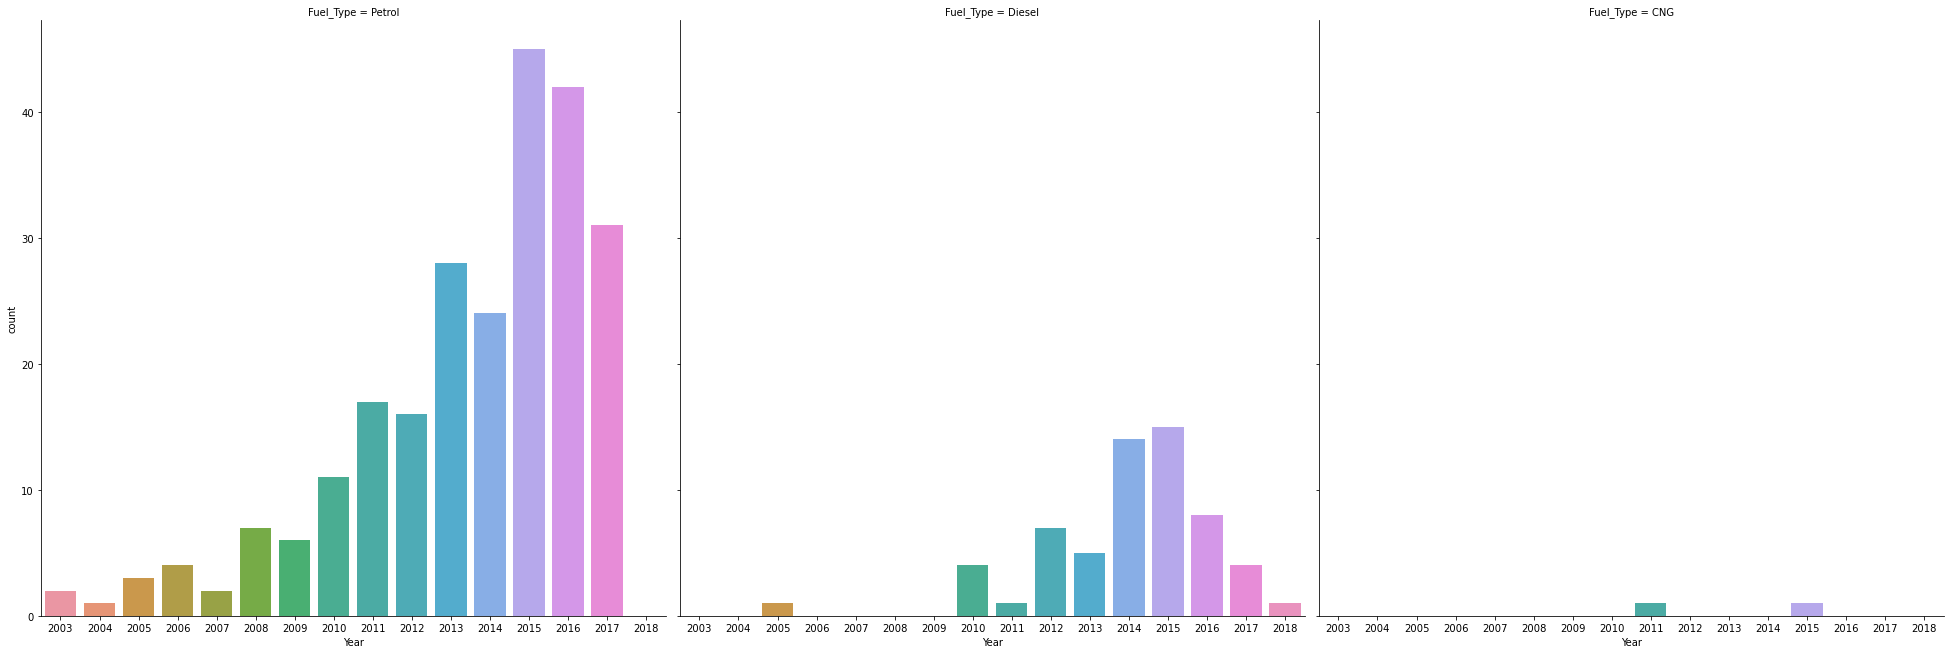

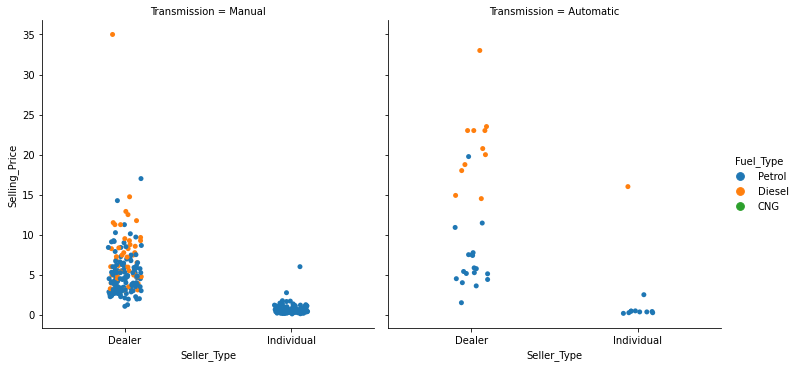

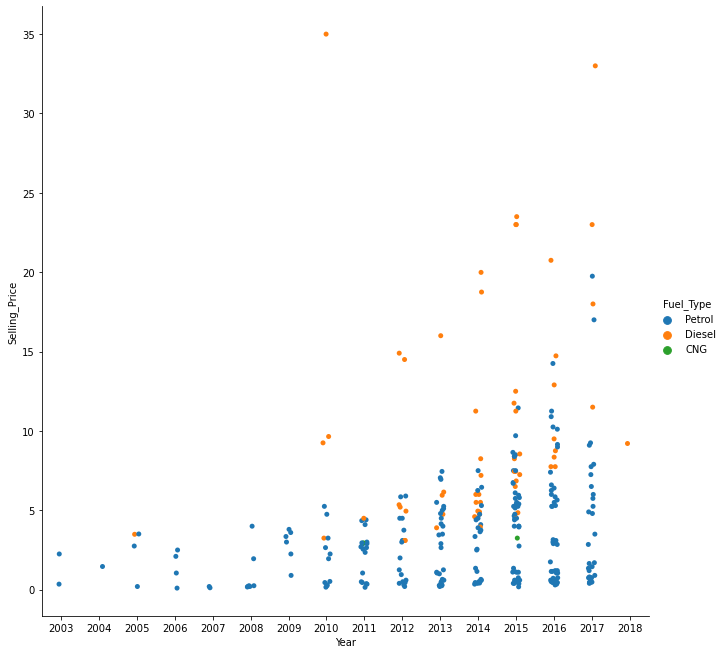

In [228]:
selling = df.Selling_Price

# comparer le prix de vente (dispersion) des voitures revendues par des particuliers vs revendeurs en fonction 
# du type de transmission
sns.catplot(x='Seller_Type', y='Selling_Price', data=df, col='Transmission')

# kind = count; compter le nombre de voiture répertoriée en fonction de l'année pour chaque type de carburant
sns.catplot(x= 'Year', data=df, col='Fuel_Type', kind='count', height=9, aspect=1)

# comparer le prix de vente (dispersion) des voitures pour les différents types de carburant revendues par des 
# particuliers vs revendeurs en fonction du type de transmission
sns.catplot(x='Seller_Type', y='Selling_Price', data=df, col='Transmission', hue='Fuel_Type')


sns.catplot(x='Year', y='Selling_Price', data=df, hue='Fuel_Type',height=9, aspect=1)

**Réponse:** Ce type de graphe est plus adapté pour l'étude de variables qualitatives (type catégorie).

**Q5:** Corrélation des variables

               Year  Selling_Price  Present_Price  Kms_Driven  Owner
Year           1.00           0.24          -0.05       -0.52  -0.18
Selling_Price  0.24           1.00           0.88        0.03  -0.09
Present_Price -0.05           0.88           1.00        0.20   0.01
Kms_Driven    -0.52           0.03           0.20        1.00   0.09
Owner         -0.18          -0.09           0.01        0.09   1.00


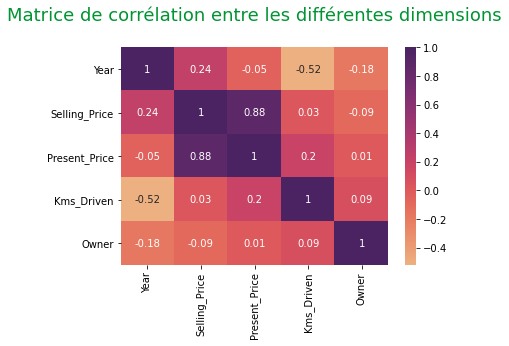

In [229]:
# Visualiser les données avec Seaborn

 # calculer la matrice de corrélation 
corr = df.corr().round(2)

# représenter le dégré de corrélation entre les différentes variables
sns.heatmap(corr, annot=True, cmap="flare")
plt.title("Matrice de corrélation entre les différentes dimensions\n", fontsize=18, color='#009432')
print(corr)

**Réponse:** L'âge et le prix de vente sont faiblement liés (coeff de corrélation = 0.24 < 0.5). On pourrait admettre qu'ils n'ont pas beaucoup d'influence l'un sur l'autre. 

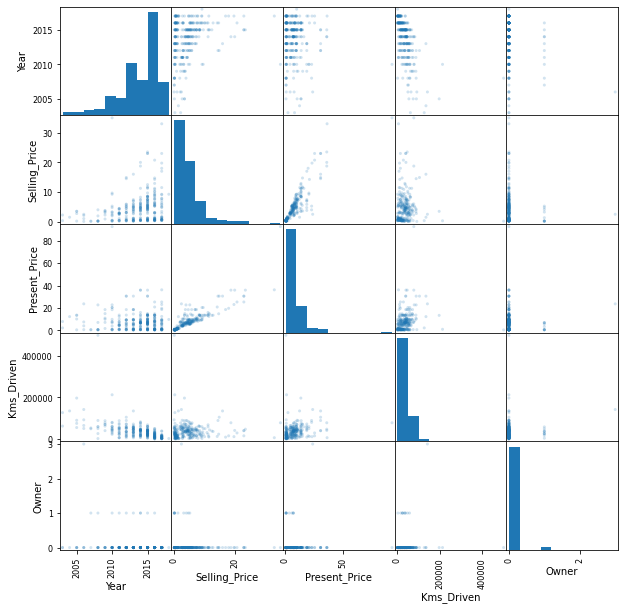

In [230]:
# SCATTER MATRIX
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

**Régression linéaire avec SCIPY**

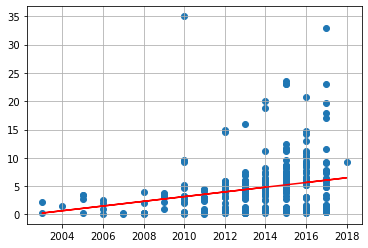

Pente: 0.4150916946355396
Ordonnée à lorigine: -831.1789245913283
r_value² 0.05576256251112732


In [231]:
# REGRESSION LINEAIRE SCIPY
# scipy
from scipy import stats
# df.to_numpy()
feat = df.Year
target = df.Selling_Price
slope, intercept, r_value, p_value, std_err = stats.linregress(feat, target)

def predict(x):
    return slope * x + intercept

def plotreg(x,y,linecolor):
    axes = plt.axes()
    axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
    plt.scatter(x,y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
    Yreg = predict(x)
    plt.plot(x, Yreg, c=linecolor)
    plt.show()

plotreg(feat,target,'r')

print('Pente:',slope) 
print('Ordonnée à l''origine:', intercept)
print('r_value²',r_value**2)

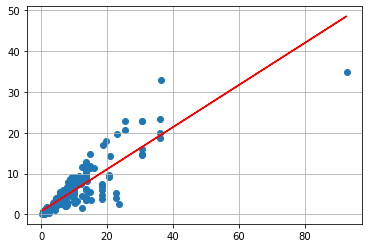

Pente: 0.5168490273953966
Ordonnée à lorigine: 0.7185274709817677
r_value²: 0.7726103146985795
r_value: 0.878982545161495


In [232]:
feat = df.Present_Price
target = df.Selling_Price
slope, intercept, r_value, p_value, std_err = stats.linregress(feat, target)

plotreg(feat,target,'r')
#r2 = r2_score(target, predict(feat))
print('Pente:',slope) 
print('Ordonnée à l''origine:', intercept)
print('r_value²:',r_value**2)

# r_value = coef de corr dans la matrice de corrélation 
print('r_value:',r_value)

**Régression linéaire avec NUMPY**

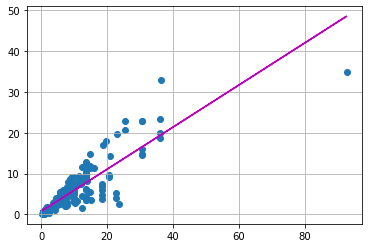

Pente: 0.5168490273953965
Ordonnée à lorigine: 0.7185274709817701
r_value²: 0.7726103146985795


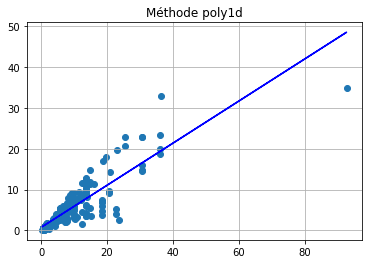

In [233]:
# REGRESSION LINEAIRE NUMPY
feat = df.Present_Price
target = df.Selling_Price
slope, intercept = np.polyfit(feat, target, 1)

#a, b = np.polyfit(feat, target, 1) ; a = pente; b = ordonnée à l'origine; 1 pour le degré du polynôme calculés par numpy
fig = plt.figure()
axes = plt.axes()
plt.subplot(1,2,1)
plotreg(feat,target,'m')
plt.title('Méthode calcul slope*x + intercept')

plt.subplot(1,2,2)
axes = plt.axes()
axes.grid() 
plt.scatter(feat,target)
model = np.polyfit(feat, target, 1)
pdct = np.poly1d(model)
plt.plot(feat,pdct(feat),'b')
plt.title('Méthode poly1d')
plt.show

print('Pente:',slope) 
print('Ordonnée à l''origine:', intercept)
print('r_value²:',r_value**2)

**Régression linéaire avec SCIKIT LEARN**

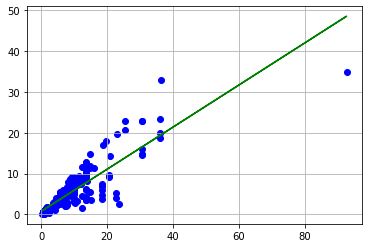

Pente: 0.5168490273953966
Ordonnée à lorigine: 0.7185274709817677
r_value²: 0.7726103146985799 = score: 0.7726103146985799


In [234]:
# REGRESSION LINEAIRE SKLEARN
from sklearn.metrics import r2_score
target = df.Selling_Price
feat = df.Present_Price
feat = np.array(feat).reshape(-1, 1)

model = linear_model.LinearRegression()
results = model.fit(feat, target)
score = model.score(feat, target)
r2 = r2_score(target, predict(feat))

slope = float(results.coef_)
intercept = results.intercept_
fit_sklearn = model.predict(feat)

axes = plt.axes()
axes.grid()
plt.scatter(feat,target,c='b') 
plt.plot(feat, fit_sklearn, c='g')
plt.show()

print('Pente:',slope) 
print('Ordonnée à l''origine:', intercept)
print('r_value²:',r2,'= score:',score)

In [235]:
# LABELLISATION DE TRANSMISSION

# créer deux nouvelles dimensions dans le dataframe
df[['Automatic','Manuel']] = pd.get_dummies(df.Transmission)
all_cat = df.select_dtypes(include='object').drop(['Car_Name'],1)

print(df)
#print(pd.get_dummies(all_cat))
#print(T[T.Automatic == 1])

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  Automatic  Manuel  
0        Dealer       Manual      0          0       1

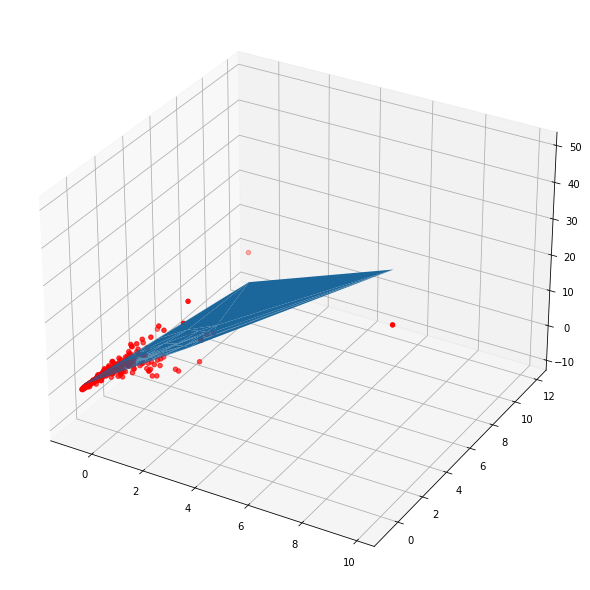

coef_x1: 4.6217890809468125     coef_x2: -0.7931077940931051    intercept: 4.661295681063124
r2_score: 0.7960259751145163


In [236]:
# REGRESSION MULTIVARIEE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import axes3d, Axes3D # utile pour afficher en 3D

Y = target
X = df[['Present_Price','Kms_Driven']].values

# DATA PRE-PROCESSING 
# Mettre les variables X1 et X2 au même ordre de grandeur
scale = StandardScaler()
X_scaled = scale.fit_transform(X) #faut-il normaliser Y aussi? 

model = linear_model.LinearRegression()   
results = model.fit(X_scaled, Y)

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
ax.scatter(X_scaled[:,0], X_scaled[:,1], Y, c='r') 
ax.plot_trisurf(X_scaled[:,0], X_scaled[:,1], results.predict(X_scaled))
#plt.scatter(X_scaled[:,0], X_scaled[:,1], results.predict(X_scaled))
plt.show()


print('coef_x1:', results.coef_[0],'    coef_x2:', results.coef_[1], '   intercept:', results.intercept_)
print('r2_score:', model.score(X_scaled,Y))

In [237]:
Y = target
X = df[['Present_Price','Kms_Driven','Automatic','Year']].values

scale = StandardScaler()
X_scaled = scale.fit_transform(X)

model = linear_model.LinearRegression()   
results = model.fit(X, Y)
# results_scale = model.fit(X_scaled, Y)

print(results.coef_)
print(results_scale.coef_)

y_predict = results.predict(X)
print(y_predict[3])

[ 5.13055798e-01 -2.45681165e-06  9.86947755e-01  4.70795197e-01]
[ 4.42754043 -0.09537892  0.33502554  1.35906657]
1.5862806491230685


* La régression linéaire s’appuie sur l’hypothèse que les données proviennent d’un phénomène qui a la forme d'une droite, c’est-à-dire qu’il existe une relation linéaire entre l’entrée (les observations) et la sortie (les prédictions). Nous avons donc notre contrainte de modèle sous-jacent qui doit être sous la forme y^=xTθ  avec  xT=(x1,x2,x3,...,xN),y^T=(y1^,y2^,y3^,...,yN^) où N est le nombre d'observations à notre disposition (id est le nombre d'appartements considérés dans notre cas).

* En général, une observation a plusieurs variables qui la caractérisent (un appartement est par exemple caractérisé par une surface et un nombre de pièces). Donc une observation est caractérisée par un vecteur  xTi=(1,vi1,vi2,...,viD)  avec D le nombre de variables caractérisant l'observation.La constante 1 est ajoutée à chaque observation pour représenter l'ordonnée à l'origine et avoir une écriture vectorielle plus compacte.

* Pour la régression linéaire, la solution de l'équation de minimisation (juste au-dessus) est exacte :**θ^=(XT.X)^(−1).XT.y** <br/>
*avec X = variables prédictives ; XT = X transposé ; y = variable cible*


Source: https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4121986-programmez-votre-premiere-regression-lineaire#/id/r-4122046

In [238]:
from numpy import linalg

# Linear Regression without standardisation (standard scaler step)
intersection = np.ones(len(X))

class MyLinearRegression:
    def __init__(self,X,Y):
        self.Y = np.array(Y)
        if X.ndim == 1:
            self.X = np.matrix([intersection,X]).T
        else:
            self.X = np.insert(X,0,intersection, axis=1)
        
    def my_lr(self,X,Y):
        if X.ndim == 2:
            self.theta = np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(Y)
            self.intersection = self.theta.item(0)
            self.coef = self.theta.item(1)
        else:
            self.theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(Y)
            self.intersection = self.theta[0]
            self.coef = self.theta[1:]
        
    def my_predict(self, X):
        if np.size(X) == 1:
            return self.coef*X+self.intersection
        else:
            self.equation = 0
            for i in range(len(self.coef)):
                self.equation += self.coef[i]*X[i]
            
            return self.equation+self.intersection

------------------My Linear Regression Model - without standardization----------------
features: 4.15
coef:  0.5168490273953957      intercept: 0.7185274709817745
y_pred = 4.269280289188143
y_pred_sklearn: 4.302661778053221


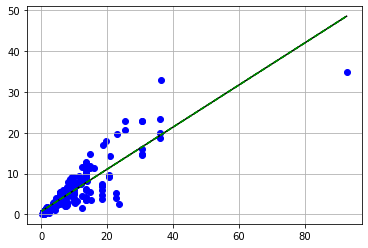

my_pred= 3.7679367326146096 


In [239]:
X = df['Present_Price'].values
mymodel = MyLinearRegression(X,Y)

mymodel.my_lr(mymodel.X,mymodel.Y)
theta = mymodel.theta
pente = mymodel.coef
oao = mymodel.intersection

print('------------------My Linear Regression Model - without standardization----------------')
print('features:', X[3])
print('coef: ', mymodel.coef, '     intercept:',mymodel.intersection)

test = 4
print('y_pred =',mymodel.my_predict(X[test]))
print('y_pred_sklearn:', y_predict[test])

my_pred = []
for i in range(len(X)):
    my_predict = mymodel.my_predict(X[i])
    my_pred.append(my_predict)

my_pred = np.array(my_pred)
idx = my_pred.argsort() 

axes = plt.axes()
axes.grid()
plt.scatter(feat,target,c='b') 
plt.plot(feat[idx], my_pred[idx],'k')
plt.plot(feat, fit_sklearn,'--g')
plt.show()

print('my_pred=',my_pred[-1],'')
#print(sortpred[:10])
#print(my_pred[:10])

In [240]:
X = df['Present_Price'].values
mymodel.X.ndim
x = np.array(theta)
theta.item(0)

0.7185274709817745

In [257]:
Y = target
X = df[['Kms_Driven','Manuel','Year']]
X_mycar = X[(X['Kms_Driven']<100000) & (X['Manuel']==1) & (X['Year']>2013)].values
Y_mycar = target[(X['Kms_Driven']<100000) & (X['Manuel']==1) & (X['Year']>2013)] 

# print(Y_mycar)

mycar_model = linear_model.LinearRegression()   
results = mycar_model.fit(X_mycar, Y_mycar)
# results_scale = model.fit(X_scaled, Y)

print(results.coef_)

mycar_predict = results.predict(X_mycar)
mycar_predict = pd.DataFrame(mycar_predict)
mycar_predict.describe()

[8.88797162e-05 0.00000000e+00 1.06285459e+00]


,0
count,159.000000
mean,4.590377
std,1.281531
min,1.434381
25%,3.807323
50%,4.448888
75%,5.319909
max,8.189240
